Salary Discrimination
The file salary.txt contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

Sex. 1 for female, 0 for male.
Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
Year. Number of years in current rank.
Degree. Highest degree. 1 for doctorate, 0 for master's.
YSdeg. Years since highest degree was earned.
Salary. Salary/year in dollars.
Tasks
Find the linear regression equation for this data using columns 1-5 to column 6.
Find the selection of columns with the best  𝑅2  score.
Report whether sex is a factor in salary.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [2]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [3]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [4]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [5]:
df.shape

(52, 6)

In [6]:
df=df.drop_duplicates()

In [7]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


## Salary vs Sex

In [8]:
svs=df[['Sex','Salary']]

In [9]:
svs

,Sex,Salary
0,0,36350
1,0,35350
2,0,28200
3,1,26775
4,0,33696
5,0,28516
6,1,24900
7,0,31909
8,0,31850
9,0,32850


In [10]:
svs.shape

(52, 2)

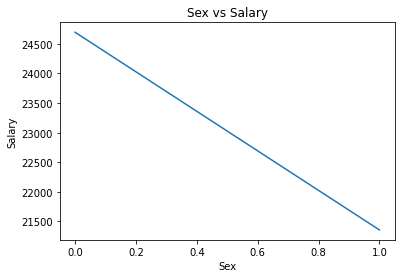

In [11]:
svs.groupby('Sex')['Salary'].mean().plot()
plt.title('Sex vs Salary')
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.show()

### Label Encoding using map

In [12]:
gender=svs['Sex']
gender=gender.map({1:'Female',0:'Male'})


In [55]:
svs.groupby(gender).count()

,Sex,Salary
Sex,,
Female,14,14
Male,38,38


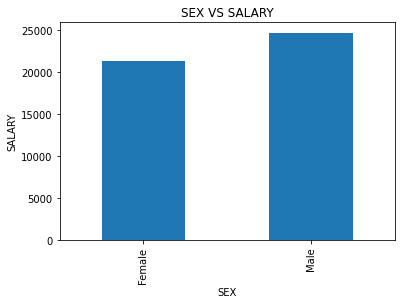

In [13]:
svs.groupby(gender)['Salary'].mean().plot(kind='bar')
plt.title('SEX VS SALARY')
plt.xlabel('SEX')
plt.ylabel('SALARY')
plt.show()

In [14]:
print('Avarage Salary for Men and Women')
svs.groupby(gender)['Salary'].mean()

Avarage Salary for Men and Women


Sex
Female    21357.142857
Male      24696.789474
Name: Salary, dtype: float64

### Women got less pay because of gender descrimination

In [ ]:
#Degree vs Salary

In [29]:
dvs=df[['Degree','Salary']]


## Degree vs Salary

In [30]:
degree=dvs['Degree']
degree=degree.map({1:'doctorate',0:'Masters'})

In [18]:
print('Avarage Salary for doctorate and Masters')
dvs.groupby(degree)['Salary'].mean()

Avarage Salary for doctorate and Masters


Degree
Masters      24359.222222
doctorate    23500.352941
Name: Salary, dtype: float64

In [61]:
dvs.corr()

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


<AxesSubplot:xlabel='Degree'>

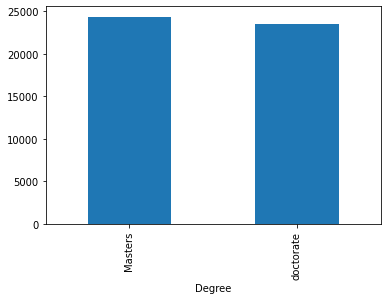

In [32]:
dvs.groupby(degree)['Salary'].mean().plot(kind='bar')

<AxesSubplot:xlabel='Degree'>

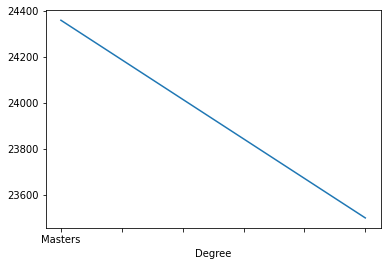

In [62]:
dvs.groupby(degree)['Salary'].mean().plot()

## Rank vs Salary

In [25]:
rvs=df[['Rank','Salary']]


In [26]:
rank=rvs['Rank']
rank=rank.map({1:'Assistant professor',2:'associate professor',3:'professor'})

In [27]:
rvs.groupby(rank)['Salary'].mean()

Rank
Assistant professor    17768.666667
associate professor    23175.928571
professor              29658.950000
Name: Salary, dtype: float64

In [60]:
rvs.corr()

,Rank,Salary
Rank,1.0,-1.0
Salary,-1.0,1.0


<AxesSubplot:xlabel='Rank'>

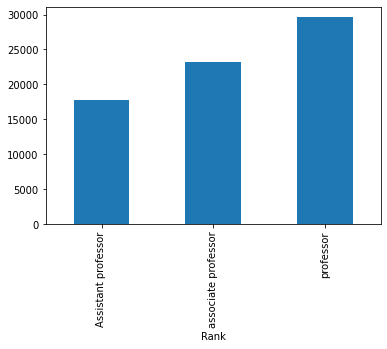

In [28]:
rvs.groupby(rank)['Salary'].mean().plot(kind='bar')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sex     52 non-null     int64
 1   Rank    52 non-null     int64
 2   Year    52 non-null     int64
 3   Degree  52 non-null     int64
 4   YSdeg   52 non-null     int64
 5   Salary  52 non-null     int64
dtypes: int64(6)
memory usage: 2.8 KB


In [35]:
yvs=df[['Year','Salary']]

<AxesSubplot:xlabel='Year'>

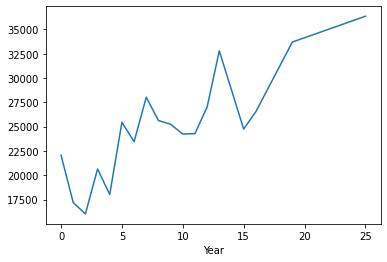

In [67]:
yvs.groupby('Year')['Salary'].mean().plot()

<AxesSubplot:xlabel='Year'>

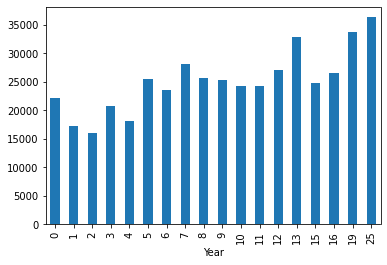

In [39]:
yvs.groupby('Year')['Salary'].mean().plot(kind='bar')

In [63]:
yvs.corr()

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


## YSdeg vs Salary

In [64]:
ysd=df[['YSdeg','Salary']]

In [66]:
ysd.corr()

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


<AxesSubplot:xlabel='YSdeg'>

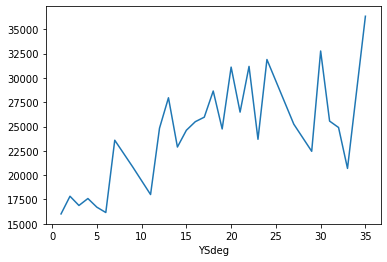

In [68]:
ysd.groupby('YSdeg')['Salary'].mean().plot()

<AxesSubplot:xlabel='YSdeg'>

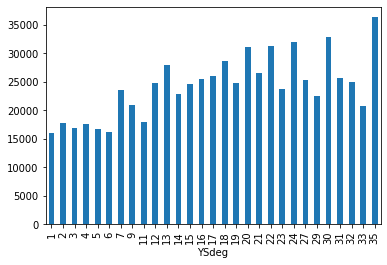

In [54]:
ysd.groupby('YSdeg')['Salary'].mean().plot(kind='bar')

In [56]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [71]:
X=df.loc[:,['Sex','Rank','Year','Degree','YSdeg']].values
y=df.loc[:,'Salary']

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [75]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train,y_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

## ModelTraining

In [77]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [79]:
coeff_df = pd.DataFrame(regressor.coef_,['Sex','Rank','Year','Degree','YSdeg'], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df

,Coefficient
Sex,477.505951
Rank,4663.425905
Year,2426.269626
Degree,125.360914
YSdeg,-496.033054


In [80]:
regressor.intercept_ # c 

23655.90243902439

In [81]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
28,26182,21438.071793
37,17095,16907.551585
11,24750,26420.307923
34,22450,22765.454548
2,28200,29412.358800
30,21600,19807.126936
40,18075,16467.430709
32,23713,18364.913236
26,24800,24896.746490
4,33696,32772.357197


In [82]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.6623158614875555
